In [1]:
#Importing Neccesary Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Projectile Motion Equation
$$y= R*Tan(\theta)-\frac{g}2*\left(\frac{R}{u*cos(\theta)}\right)^2$$

### Hanging Chain Equation
$$y=y_o+a*\left( cosh\left( \frac{x-x_o}{a} \right) -1 \right)$$

In [2]:
global projectile
global chain

projectile = lambda m, u, R: (R*np.tan(m*np.pi/180)-(9.81/2)*(R/u/np.cos(m*np.pi/180))**2)   #function for trajectory

#list of points is used so that same code of Bisection and Newton Raphson can be used
chain= lambda A, L, points: ( 2*A*np.sinh((points[1][0]-points[0][0])/(2*A)) -np.sqrt(L**2-(points[1][1]-points[0][1])**2) )


In [3]:
#Bisection Method
def bisection_method(a,b, problem,input1, input2, tolerance=pow(10,-5), n_max=10000):
    
    if problem== "projectile":
        f=projectile
    elif problem=="chain":
         f=chain
    else:
        print("Problem is not trajectory or chain type")
        return -1,-1
        
    i=1                                                                 #Loop runs initially without any condition so i=1
    initial1=a
    initial2=b
    while True:
        mid=(a+b)/2
        y1=f(a,input1,input2)
        y2=f(b,input1,input2)
        y=f(mid,input1,input2)
                
        if abs(y)<tolerance:
            return mid,i
        elif i>n_max:
            print("Max iteration reached for the guess {}, {}".format(initial1,initial2))
            return mid,i
        if y*y1<0:
            b=mid   
        else:
            a=mid
        i=i+1                                                           #Counter is increased by 1
        


In [4]:
#Newton Raphson Method
def Newton_Raphson(xo, problem,input1, input2, tolerance=pow(10,-5), n_max=10000):
    
    if problem== "projectile":
        func=projectile
    elif problem=="chain":
         func=chain
    else:
        print("Problem is not trajectory or chain type")
        return -1,-1
    
    i=1
    h=pow(10,-5)
    
    f=lambda xo: func(xo,input1,input2)
        
        
            
    function_derivative= lambda function,x: ((function(x+h)-function(x))/h)
    
    initial=xo
    while True:
        temp=xo
        try:
            
            xo=xo-f(xo)/function_derivative(f,xo)
            i=i+1
            if abs(temp-xo)<tolerance:
                return xo,i
            elif i>n_max:
                print("Max Iteration Reached for the guess {}".format(initial))
                return xo,i
        except:
            print("Zero Division Error occurred")
            return -1,-1
            


In [5]:
def projectile_problem():
    
    #Inputs
    u=float(input("\nEnter initial velocity "))             #Input1
    R=float(input("Enter range "))             #Input2

    R_max= u**2/(9.81)                                                  #Maximum possible range
    print("\nInput range is {} m, intial velcoity is {} m/s.".format(R,u))
    print("Maximum range is {} m.".format(R_max))
    if R<0 or R>R_max:                                                  #Condition to Output the error
        print ("Out of Range")
        return -1,-1
        
    method = int(input("Select the method you want to solve the problem with \n1: Bisection Method \n2: Newton Raphson Method \n"))
    tol=float(input("Enter tolerance (ideally 0.00001) "))
    n_max=int(float(input("Enter maximum number of iterations (ideally 10000) ")))
    if method==1:
        a=int(input("Enter lower guess for theta (ideally 0) "))
        b=int(input("Enter upper guess for theta (ideally 45) "))
        out,iteration=bisection_method(a,b,"projectile",u,R, tol, n_max)
    elif method==2:
        xo=int(float(input("Enter initial guess of xo for theta ")))
        out,iteration=Newton_Raphson(xo,"projectile",u,R,tol, n_max)
        #default values for a and b
        a=0
        b=45                  
    else:
        print("Method is not valid. Enter 1 or 2 only.")
        return -1,-1
    #Output
    print("\nAngle for the given problem is {} degrees.".format(out))
    print("Number of iterations required = {}".format(iteration))
    
    if iteration!=-1 and iteration<=n_max:

        #Plotting theta versus f(theta), solution approach
        theta=np.linspace(a,b,num=(b-a)*10, endpoint=True)
        y=projectile(theta,u,R)
        fig, ax=plt.subplots(figsize=(10,10))
        ax.plot(theta,y,label="Projectile Equation",linewidth=2,)
        ax.scatter(out,0,c='red')
        ax.set(xlabel="Angles in degree", ylabel="function value", title="Graph of y versus theta")
        ax.legend()
        ax.grid(True,linestyle="-.")
        ax.text(a,0, r"$y= R*Tan(\theta)-\frac{g}{2}*\left(\frac{R}{u*cos(\theta)}\right)^2$", fontsize='x-large')
        ax.margins(0.1,0.1)
        plt.show()

        #Plotting x versus y, actual path
        x=np.linspace(0,int(R),num=int(R)*10,endpoint=True)
        Y=projectile(out,u,x)
        fig, ax=plt.subplots(figsize=(10,10))
        ax.plot(x,Y,label="Projectile Equation",linewidth=2,)
        ax.set(xlabel="Horizontal distance", ylabel="Height (Vertical Distance)", title="Graph of the motion y versus x")
        ax.legend()
        ax.grid(True,linestyle="-.")
        ax.text(0.5,0, r"$Y= x*Tan(\theta)-\frac{g}{2}*\left(\frac{x}{u*cos(\theta)}\right)^2$", fontsize='x-large')
        ax.margins(0.1,0.1)
        plt.show()

    

In [6]:
def hanging_chain_problem():
    
    L=float(input("Enter the length of the chain "))  #INPUT1
    x1=float(input("Enter x1 "))
    y1=float(input("Enter y1 "))
    x2=float(input("Enter x2 "))
    y2=float(input("Enter y2 "))
    points=[(x1,y1),(x2,y2)]                          #INPUT2
    
    #First Checking of validity
    distance=((x2-x1)**2+(y2-y1)**2)**(0.5)
    if L<distance:
        print("\nThe length of chain is too small to be hanging from two points")
        return -1,-1
    
    
    method = int(input("Select the method you want to solve the problem with \n1:Bisection Method \n2: Newton Raphson Method \n"))
    tol=float(input("Enter tolerance (ideally 0.00001) "))
    n_max=int(float(input("Enter maximum number of iterations (ideally 10000) ")))
    
    if method==1:
        a=float(input("Enter lower guess for a (ideally 0.1) "))
        b=float(input("Enter upper guess for a (ideally 5 to 10) "))
        out,iteration=bisection_method(a,b,"chain",L,points,tol,n_max)
    elif method==2:
        xo=float(input("Enter initial guess of xo for a "))
        out,iteration=Newton_Raphson(xo,"chain",L,points,tol,n_max)                
    else:
        print("Method is not valid. Enter 1 or 2 only.")
        return -1,-1
    #Output
    print("\nValue of a for the hanging chain problem is {} ".format(out))
    print("Number of iterations required = {}".format(iteration))
    
    A=abs(out)
    
    if not np.isnan(out) and iteration!=-1 and iteration<=n_max:
        
    
        x_o= (x1+x2)/2+0.5*A*(np.log((L-y2+y1)/(L+y2-y1)))
        y_o=y2-A*(np.cosh((x2-x_o)/A)-1)
        print("Lower point in the graph", x_o,y_o)


        '''
        #Plotting a versus f(a)
        #Because of sharp increase in slope of the graph, division by Zero and other errors are encountered.
        #A desmos Graph is attached instead

        #Following lines can be used to view approximate graph if needed
        Ax=np.linspace(0,A+1,num=10000,endpoint=True)
        fAx=chain(Ax,L,points)
        fig, ax=plt.subplots(figsize=(10,10))
        ax.plot(Ax,fAx,label="Hanging Chain Profile ",linewidth=2,)
        ax.scatter(A,0,c='red')
        ax.set(xlabel="Horizontal distance", ylabel="Height (Vertical Distance)",
        title="Graph of the chain suspended under gravity")
        ax.legend()
        ax.grid(True,linestyle="-.")
        ax.margins(0.1,0.1)
        plt.show()
        '''



        #plotting chain profile
        y_chain= lambda A,x: (y_o+A*(np.cosh((x-x_o)/A)-1))
        x=np.linspace(x1,x2,num=100,endpoint=True)
        Y=y_chain(A,x)

        fig, ax=plt.subplots(figsize=(10,10))
        ax.plot(x,Y,label="Hanging Chain Profile ",linewidth=2,)
        ax.scatter(x_o,y_o,c='red')
        ax.set(xlabel="Horizontal distance", ylabel="Height (Vertical Distance)",
               title="Graph of the chain suspended under gravity")
        ax.legend()
        ax.grid(True,linestyle="-.")
        ax.text(x_o,y_o, r"$y=y_o+a*\left( cosh\left( \frac{x-x_o}{a} \right) -1 \right)$", fontsize='x-large')
        ax.margins(0.1,0.1)
        plt.show()


    
    

Enter the choice for root finding
1: Projectile
2: Hanging Chain
Select 1 for Projectile and 2 for Hanging Chain problem 
2
Enter the length of the chain 16
Enter x1 1
Enter y1 3
Enter x2 10
Enter y2 1
Select the method you want to solve the problem with 
1:Bisection Method 
2: Newton Raphson Method 
1
Enter tolerance (ideally 0.00001) 0.0001
Enter maximum number of iterations (ideally 10000) 1000
Enter lower guess for a (ideally 0.1) 0.1
Enter upper guess for a (ideally 5 to 10) 5

Value of a for the hanging chain problem is 2.310125350952148 
Number of iterations required = 18
Lower point in the graph 5.790283915915883 -4.021816894276114


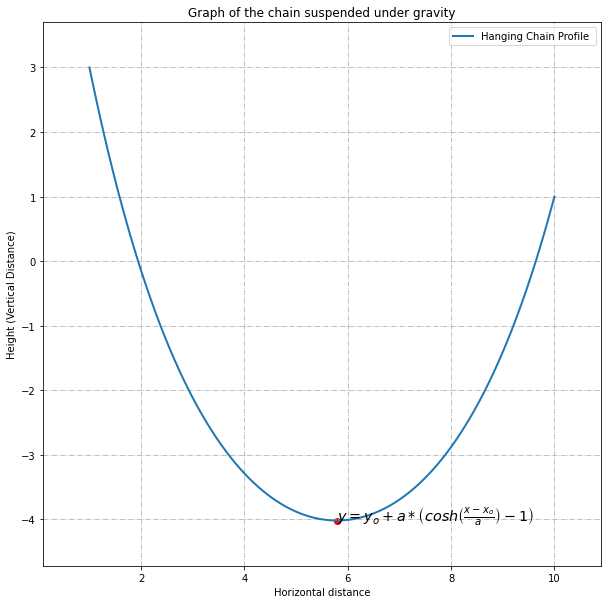

Do you want to continue (y/n)? n


In [7]:
while True:
    
    choice=int(input("Enter the choice for root finding\n1: Projectile\n2: Hanging Chain\nSelect 1 for Projectile and 2 for Hanging Chain problem \n"))
    if choice==1:
        projectile_problem()
    elif choice==2:
        hanging_chain_problem()
    else:
        print("Choice is not valid. Enter 1 or 2 only.")
    
    select=input("Do you want to continue (y/n)? ")
    if select.lower()!="y":
        break

In [ ]:
name=["u",'R',"a","b","Theta (Bisection)", "No. of Iterations (Bisection)"]
df_projectile=pd.DataFrame(columns=name)
df_projectile['u']=[10,10,10,10,20,20,20,20]
df_projectile['R']=[10,10,10,10,15,15,15,15]
df_projectile['a']=[0,1,2,3,0,1,2,3]
df_projectile['b']=[45,44,43,42,45,44,43,42]
i=0
for u,R,a,b in list(zip(df_projectile['u'],df_projectile['R'],df_projectile['a'],df_projectile['b'])):
    output,iteration=bisection_method(a,b,"projectile",u,R)
    df_projectile.at[i,'Theta (Bisection)']=output
    df_projectile.at[i,'No. of Iterations (Bisection)']=iteration
    i=i+1
df_projectile.head(8)

In [ ]:
name=["u",'R',"xo","Theta (Newton Raphson)", "No. of Iterations (NR)"]
df_projectile_NR=pd.DataFrame(columns=name)
df_projectile_NR['u']=[10,10,10,10,20,20,20,20]
df_projectile_NR['R']=[10,10,10,10,15,15,15,15]
df_projectile_NR['xo']=[10,20,30,40,10,20,30,40]
i=0
for u,R,theta in list(zip(df_projectile_NR['u'],df_projectile_NR['R'],df_projectile_NR['xo'])):
    output,iteration=Newton_Raphson(theta,"projectile",u,R)
    df_projectile_NR.at[i,'Theta (Newton Raphson)']=output
    df_projectile_NR.at[i,'No. of Iterations (NR)']=iteration
    i=i+1
df_projectile_NR.head(8)

In [ ]:
name=["Length",'Points',"a","b","A (Bisection)", "No. of Iterations"]
df_chain=pd.DataFrame(columns=name)
df_chain['Length']=[8,8,8,8,10,10,10,10]
df_chain['Points']=[[(1,1),(6,6)],[(1,1),(6,6)],[(1,1),(6,6)],[(1,1),(6,6)],[(2,12),(8,12)],[(2,12),(8,12)],[(2,12),(8,12)],[(2,12),(8,12)]]
df_chain['a']=[0.1,0.1,0.6,0.6,0.1,0.1,0.6,0.6]
df_chain['b']=[5,10,5,10,5,10,5,10]
i=0
for l,p,a,b in list(zip(df_chain['Length'],df_chain['Points'],df_chain['a'],df_chain['b'])):
    output,iteration=bisection_method(a,b,"chain",l,p)
    df_chain.at[i,'A (Bisection)']=output
    df_chain.at[i,'No. of Iterations']=iteration
    i=i+1
df_chain.head(8)

In [ ]:
name=["Length",'Points',"Guess A","A (NR)", "No. of Iterations (NR)"]
df_chain=pd.DataFrame(columns=name)
df_chain['Length']=[8,8,8,8,10,10,10,10]
df_chain['Points']=[[(1,1),(6,6)],[(1,1),(6,6)],[(1,1),(6,6)],[(1,1),(6,6)],[(2,12),(8,12)],[(2,12),(8,12)],[(2,12),(8,12)],[(2,12),(8,12)]]
df_chain['Guess A']=[0.1,1,2,3,0.1,1,2,3]
i=0
for l,p,xo in list(zip(df_chain['Length'],df_chain['Points'],df_chain['Guess A'])):
    output,iteration=Newton_Raphson(xo,"chain",l,p)
    df_chain.at[i,'A (NR)']=output
    df_chain.at[i,'No. of Iterations (NR)']=iteration
    i=i+1
df_chain.head(8)

The code consists of function (module) for solving two types of problem using Newton Raphson or Bisection Method. Initially, user is asked to select the type of problem. It can be projectile or hanging chain problem discussed in the class. User has to follow the instructions as displayed. After the problem selection, user is asked for the method of solving the problem. Relevant inputs for the problem is asked from user. Ideal value is suggested where necessary. Newton Raphson for hanging chain problem can jump and may not converge if initial guess is not near the actual guess. Bisection method, though taking more time, in most of the cases solve the hanging chain problem. Newton Raphson is fast for projectile motion problem.